<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data Analysis
###  Author: Kyle Ness

## Problem Statement

There are a lot of factors that go into the pricing of homes / real estate. Some of these may be obvious and their effects on price well-known, like the total area of a home in square feet or the number of bedrooms and baths the house has. Others, however, may be more abstract or subjectively valued, like whether a house has a masonry veneer or how long the frontage of the house's lot is. Further, there may be many significant interactions between the variables of a house that also affect valuation. Thus, analyzing the Ames, Iowa housing dataset consisting of 2,051 observations on 79 independent variables, it should be possible to arrive at a model that will accurately estimate a given home's sale price despite the complexity of the task. Thus, this report seeks to help the average homeowner be more informed about their property's value and valuations in RE markets in general.

In [596]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import RidgeCV

%matplotlib inline 

In [680]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

train.columns = train.columns.str.lower().str.replace(' ', '_')
test.columns = test.columns.str.lower().str.replace(' ', '_')

In [681]:
pd.set_option("display.max_rows", None, "display.max_columns", None) #Found in documentation -> shows entire pandas print out

train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [682]:
train.shape

(2051, 81)

In [683]:
train.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
b

In [684]:
train.isnull().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

In [685]:
nullcols = ['lot_frontage', 'alley', 'mas_vnr_type', 'mas_vnr_area', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 
            'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 
            'bsmt_full_bath', 'bsmt_half_bath', 'fireplace_qu', 'garage_type', 'garage_finish',
            'garage_cars', 'garage_area', 'garage_qual', 'garage_cond', 'pool_qc', 'fence', 'misc_feature', 'garage_yr_blt']        

In [686]:
train[nullcols[0]].fillna(0, inplace=True) #NA Lot Frontage probably means no frontage at all

train[nullcols[1]].fillna('None', inplace=True) #NA = no alley

train[nullcols[2]].fillna('None', inplace=True)  #NA likely = no masonry veneer
train[nullcols[3]].fillna(0, inplace = True)  #NA -> no masonry veneer -> no area -> 0 sq ft

#Basement
train[nullcols[4]].fillna('None', inplace=True) #NA = no basement
train[nullcols[5]].fillna('None', inplace=True) #NA = no baseement8
train[nullcols[6]].fillna('None', inplace=True)
train[nullcols[7]].fillna('None', inplace=True)
train[nullcols[8]].fillna(0, inplace=True)
train[nullcols[9]].fillna('None', inplace=True)
train[nullcols[10]].fillna(0, inplace=True)
train[nullcols[11]].fillna(0, inplace=True)
train[nullcols[12]].fillna(0, inplace=True) #NA = no basement, continuous variables
train[nullcols[13]].fillna(0, inplace=True)
train[nullcols[14]].fillna(0, inplace=True)

train[nullcols[15]].fillna('None', inplace=True) #NA = no fireplace

#Garage
train[nullcols[16]].fillna('None', inplace = True) #No garage
train[nullcols[17]].fillna('None', inplace=True) #NA = no garage
train[nullcols[18]].fillna(0, inplace=True) #NA = no cars or no garage
train[nullcols[19]].fillna(0, inplace=True)
train[nullcols[20]].fillna('None', inplace=True)
train[nullcols[21]].fillna('None', inplace=True)
train[nullcols[25]].fillna(train.garage_yr_blt.median(), inplace = True)

train[nullcols[22]].fillna('None', inplace=True) #NA = no pool

train[nullcols[23]].fillna('None', inplace=True) #NA = no fence

train[nullcols[24]].fillna('None', inplace=True) #NA = no misc features


In [687]:
test[nullcols[0]].fillna(0, inplace=True) #NA Lot Frontage probably means no frontage at all

test[nullcols[1]].fillna('None', inplace=True) #NA = no alley

test[nullcols[2]].fillna('None', inplace=True)  #NA likely = no masonry veneer
test[nullcols[3]].fillna(0, inplace = True)  #NA -> no masonry veneer -> no area -> 0 sq ft

#Basement
test[nullcols[4]].fillna('None', inplace=True) #NA = no basement
test[nullcols[5]].fillna('None', inplace=True) #NA = no baseement8
test[nullcols[6]].fillna('None', inplace=True)
test[nullcols[7]].fillna('None', inplace=True)
test[nullcols[8]].fillna(0, inplace=True)
test[nullcols[9]].fillna('None', inplace=True)
test[nullcols[10]].fillna(0, inplace=True)
test[nullcols[11]].fillna(0, inplace=True)
test[nullcols[12]].fillna(0, inplace=True) #NA = no basement, continuous variables
test[nullcols[13]].fillna(0, inplace=True)
test[nullcols[14]].fillna(0, inplace=True)

test[nullcols[15]].fillna('None', inplace=True) #NA = no fireplace

#Garage
test[nullcols[16]].fillna('None', inplace = True) #No garage
test[nullcols[17]].fillna('None', inplace=True) #NA = no garage
test[nullcols[18]].fillna(0, inplace=True) #NA = no cars or no garage
test[nullcols[19]].fillna(0, inplace=True)
test[nullcols[20]].fillna('None', inplace=True)
test[nullcols[21]].fillna('None', inplace=True)
test[nullcols[25]].fillna(train.garage_yr_blt.median(), inplace = True)

test[nullcols[22]].fillna('None', inplace=True) #NA = no pool

test[nullcols[23]].fillna('None', inplace=True) #NA = no fence

test[nullcols[24]].fillna('None', inplace=True) #NA = no misc features


In [688]:
train.isnull().sum() #No more missing values!

id                 0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area  

In [689]:
test.electrical.fillna('Mix', inplace = True)

In [690]:
test.isnull().sum()

id                 0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area  

In [691]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,None,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,None,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,None,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,None,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,None,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,None,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,None,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,None,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,None,None,None,0,3,2010,WD,138500


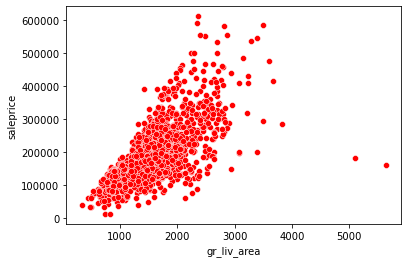

In [693]:
#Outlier identification - Using gr_liv_area (above ground sq ft) as a proxy for total square foot of home

sns.scatterplot(x = train['gr_liv_area'],
                y= train['saleprice'],
                color = 'red');

#Only outliers seem to be the two all the way to the right - we can cut these out of the dataset.

train = train[train['gr_liv_area'] < 4500]

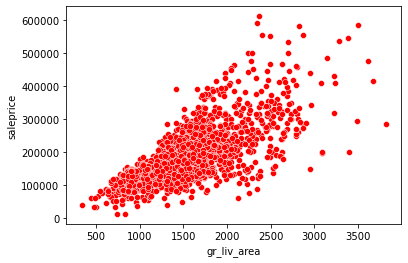

In [694]:
sns.scatterplot(x = train['gr_liv_area'],
                y= train['saleprice'],
                color = 'red');

#Better!

In [695]:
#Column 'MS Subclass' is a categorical variable, but is currently a int dtype - let's change that:
train['ms_subclass'] = train['ms_subclass'].map(lambda x: str(x))

#The Mo Sold column can also be better described by replacing integers with their corresponding months.
train['mo_sold'].replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep',
                          10: 'oct', 11: 'nov', 12: 'dec'}, inplace = True)

In [696]:
#Interaction Terms - starting with ones done easily by hand (combining quals + conds)
train['overallcomb'] = train.overall_qual * train.overall_cond

train.bsmt_qual = train.bsmt_qual.map({'None': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
train.bsmt_cond = train.bsmt_cond.map({'None': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
train['bsmtcomb'] = train.bsmt_qual * train.bsmt_cond

train.garage_qual = train.garage_qual.map({'None': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
train.garage_cond = train.garage_cond.map({'None': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
train['garagecomb'] = train.garage_qual * train.garage_cond

train.exter_qual = train.exter_qual.map({ 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
train.exter_cond = train.exter_cond.map({ 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
train['extercomb'] = train.exter_qual * train.exter_cond

train['sfcomb'] = train.gr_liv_area + train.total_bsmt_sf

In [697]:
#Interaction Terms - starting with ones done easily by hand (combining quals + conds)
test['overallcomb'] = test.overall_qual * test.overall_cond

test.bsmt_qual = test.bsmt_qual.map({'None': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
test.bsmt_cond = test.bsmt_cond.map({'None': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
test['bsmtcomb'] = test.bsmt_qual * test.bsmt_cond

test.garage_qual = test.garage_qual.map({'None': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
test.garage_cond = test.garage_cond.map({'None': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
test['garagecomb'] = test.garage_qual * test.garage_cond

test.exter_qual = test.exter_qual.map({ 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
test.exter_cond = test.exter_cond.map({ 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
test['extercomb'] = test.exter_qual * test.exter_cond

test['sfcomb'] = test.gr_liv_area + test.total_bsmt_sf

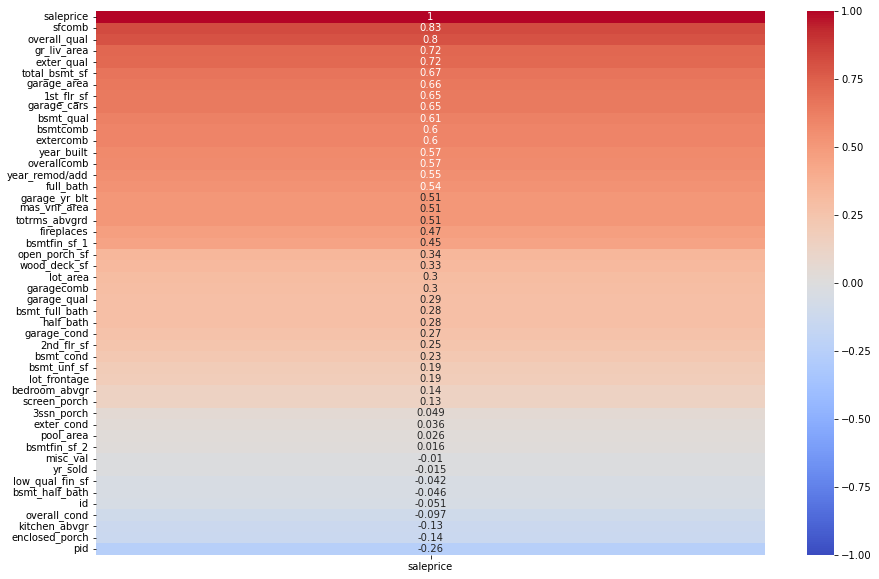

In [698]:
#Interaction terms using Polynomial Features -- First we will look for which variables are significantly correlated to price
corr = train.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr[['saleprice']].sort_values(by = 'saleprice', ascending = False), 
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');

In [699]:
#The top 10 highest correlation coefficients with saleprice are below. These should prove useful for generating 
#interaciton terms. These could also be used for a more simple multi-linear regression
top_10 = ['sfcomb', 'overall_qual', 'gr_liv_area', 'exter_qual', 'total_bsmt_sf', 
          'garage_area', '1st_flr_sf', 'garage_cars', 'bsmt_qual', 'bsmtcomb']

#Choosing NOT to use PolynomialFeatures - Do not want excessive interaction terms leading to overfit model

In [700]:
cat_feats = train.select_dtypes(include = ["object"]).columns
train1 = train.drop(columns = cat_feats)
train2 = train[cat_feats]

train2 = pd.get_dummies(train2)

train_new = pd.concat([train1, train2], axis = 1)

In [732]:
X = train_new.drop(['saleprice', 'pid', 'id'], axis = 'columns')
y = train_new.saleprice

In [733]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [734]:
X_train.shape

(1639, 305)

In [703]:
#Scaling
ss = StandardScaler()

Z_train = ss.fit_transform(X_train)

Z_test = ss.transform(X_test)

In [705]:
#RidgeCV
ols = LinearRegression()

ols.fit(X_train, y_train)

LinearRegression()

In [706]:
print(f'Training Score: {ols.score(X_train, y_train)}')
print(f'Testing Score: {ols.score(X_test, y_test)}') #Big problem here!! --> Overfit

Training Score: 0.9407718067688924
Testing Score: 0.9256214779313228


In [707]:
#RidgeCV -- Taken from Lesson 4.03
alphas = np.logspace(0, 5, 100)
# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas = alphas, cv = 5)
# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5)

In [708]:
ridge_cv.alpha_

298.364724028334

In [709]:
ridge_cv.best_score_

0.9100999428673816

In [710]:
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

0.9364094334874865
0.9260043669994035


In [ ]:
preds = ridge_cv.predict(

In [736]:
# -------------------------  Disregard above ridge model, did not have chance to predict with this ------------------

In [712]:
X_simp = train[top_10]
y_simp = train['saleprice']

In [713]:
X_train_simp, X_test_simp, y_train_simp, y_test_simp = train_test_split(X_simp, y_simp, test_size = 0.2, random_state = 42)

In [714]:
lr = LinearRegression()

In [715]:
lr.fit(X_train_simp, y_train_simp)

LinearRegression()

In [716]:
#Train Score
lr.score(X_train_simp, y_train_simp)

0.8390398819740101

In [717]:
# Test Score
lr.score(X_test_simp, y_test_simp)

0.8344471015909346

In [718]:
preds = lr.predict(test[top_10])

In [719]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,overallcomb,bsmtcomb,garagecomb,extercomb,sfcomb
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,None,Detchd,1910.0,Unf,1,440,1,1,Y,0,60,112,0,0,0,None,None,None,0,4,2006,WD,48,6,1,6,2948
1,2718,905108090,90,RL,0.0,9662,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,None,Attchd,1977.0,Fin,2,580,3,3,Y,170,0,0,0,0,0,None,None,None,0,8,2006,WD,20,12,9,9,3934
2,2414,528218130,60,RL,58.0,17104,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,3,3,Y,100,24,0,0,0,0,None,None,None,0,9,2006,New,35,16,9,12,2150
3,1989,902207150,30,RM,60.0,8520,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,3,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,None,Detchd,1935.0,Unf,2,480,2,3,N,0,0,184,0,0,0,None,None,None,0,7,2007,WD,30,9,6,12,1936
4,625,535105100,20,RL,0.0,9500,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,3,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,3,3,Y,0,76,0,0,185,0,None,None,None,0,7,2009,WD,30,12,9,9,2788


In [723]:
test['SalePrice'] = preds

In [724]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,overallcomb,bsmtcomb,garagecomb,extercomb,sfcomb,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,None,Detchd,1910.0,Unf,1,440,1,1,Y,0,60,112,0,0,0,None,None,None,0,4,2006,WD,48,6,1,6,2948,170635.722426
1,2718,905108090,90,RL,0.0,9662,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,None,Attchd,1977.0,Fin,2,580,3,3,Y,170,0,0,0,0,0,None,None,None,0,8,2006,WD,20,12,9,9,3934,225621.653967
2,2414,528218130,60,RL,58.0,17104,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,3,3,Y,100,24,0,0,0,0,None,None,None,0,9,2006,New,35,16,9,12,2150,200558.113725
3,1989,902207150,30,RM,60.0,8520,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,3,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,None,Detchd,1935.0,Unf,2,480,2,3,N,0,0,184,0,0,0,None,None,None,0,7,2007,WD,30,9,6,12,1936,145369.015846
4,625,535105100,20,RL,0.0,9500,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,3,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,3,3,Y,0,76,0,0,185,0,None,None,None,0,7,2009,WD,30,12,9,9,2788,182537.071491


In [726]:
test.rename(columns = {'id':'Id'}, inplace = True)

In [727]:
lr_submission = test[['Id', 'SalePrice']]

In [722]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,overallcomb,bsmtcomb,garagecomb,extercomb,sfcomb
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,None,Detchd,1910.0,Unf,1,440,1,1,Y,0,60,112,0,0,0,None,None,None,0,4,2006,WD,48,6,1,6,2948
1,2718,905108090,90,RL,0.0,9662,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,None,Attchd,1977.0,Fin,2,580,3,3,Y,170,0,0,0,0,0,None,None,None,0,8,2006,WD,20,12,9,9,3934
2,2414,528218130,60,RL,58.0,17104,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,3,3,Y,100,24,0,0,0,0,None,None,None,0,9,2006,New,35,16,9,12,2150
3,1989,902207150,30,RM,60.0,8520,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,3,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,None,Detchd,1935.0,Unf,2,480,2,3,N,0,0,184,0,0,0,None,None,None,0,7,2007,WD,30,9,6,12,1936
4,625,535105100,20,RL,0.0,9500,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,3,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,3,3,Y,0,76,0,0,185,0,None,None,None,0,7,2009,WD,30,12,9,9,2788


In [728]:
lr_submission.set_index('Id', inplace = True)

In [729]:
lr_submission.head()

,SalePrice
Id,
2658,170635.722426
2718,225621.653967
2414,200558.113725
1989,145369.015846
625,182537.071491


In [731]:
lr_submission.to_csv('top10_submission.csv')

## Conclusions / Recommendations

According to this analysis, home prices seem highly correlated with the total square foot area of the home, the overal subjective quality and exterior condition / quality of the home, and a few other features like how recently the house was built (where the most recently built are higher in price). 

### DNF